In [1]:
import os
import csv
import pandas as pd

# Task 2

In [27]:
# Preparing file_data for filtering top 400 for each video

# file_data is array of ["action folder name", "file_name", "file path"]

import os

folder_path = "E:\Coding\MultimediaWebDatabases\Assets\hmdb51_org_stips"

file_data = []

for root, dirs, files in os.walk(folder_path):
    for file in files:

        folder_name = os.path.basename(root)

        full_path = os.path.join(root, file)

        file_data.append([folder_name, file, full_path])

for entry in file_data[:5]:
    print(entry) 

print(len(file_data))

print(file_data[:5])

['brush_hair', 'April_09_brush_hair_u_nm_np1_ba_goo_0.avi.txt', 'E:\\Coding\\MultimediaWebDatabases\\Assets\\hmdb51_org_stips\\brush_hair\\April_09_brush_hair_u_nm_np1_ba_goo_0.avi.txt']
['brush_hair', 'April_09_brush_hair_u_nm_np1_ba_goo_1.avi.txt', 'E:\\Coding\\MultimediaWebDatabases\\Assets\\hmdb51_org_stips\\brush_hair\\April_09_brush_hair_u_nm_np1_ba_goo_1.avi.txt']
['brush_hair', 'April_09_brush_hair_u_nm_np1_ba_goo_2.avi.txt', 'E:\\Coding\\MultimediaWebDatabases\\Assets\\hmdb51_org_stips\\brush_hair\\April_09_brush_hair_u_nm_np1_ba_goo_2.avi.txt']
['brush_hair', 'atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_0.avi.txt', 'E:\\Coding\\MultimediaWebDatabases\\Assets\\hmdb51_org_stips\\brush_hair\\atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_0.avi.txt']
['brush_hair', 'atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_1.avi.txt', 'E:\\Coding\\MultimediaWebDatabases\\Assets\\hmdb51_org_stips\\brush_hair\\atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_1.avi

In [28]:
import os
import csv

# Folder path where filtered stips will be saved.
# Action folders will be created and each folder will have csv files for each video
output_base_path = 'E:\Coding\MultimediaWebDatabases\Assets\hmdb51_org_stips_filtered_demo'
# Change basepath to new one for demo purposes

for i in file_data:

    indi_data = []

    with open(i[2], 'r') as file:
        print(f"Reading from: {i[1]}")
        for line in file:
            indiLine = line.strip().split("\t")
            
            if len(indiLine) == 1:
                continue

            indi_data.append([float(x) for x in indiLine])

    indi_data.sort(key=lambda x: x[6], reverse=True)

    if len(indi_data) < 400:
        print(f"Less than 400 points for {i[1]}")

    indi_data = indi_data[:400]

    folder_name = i[0]  
    file_name = i[1].replace('.txt', '.csv') 

    output_folder_path = os.path.join(output_base_path, folder_name)
    output_file_path = os.path.join(output_folder_path, file_name)

    os.makedirs(output_folder_path, exist_ok=True)

    with open(output_file_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerows(indi_data)

    print(f"Saved {len(indi_data)} rows to {output_file_path}")

Reading from: April_09_brush_hair_u_nm_np1_ba_goo_0.avi.txt
Saved 400 rows to E:\Coding\MultimediaWebDatabases\Assets\hmdb51_org_stips_filtered_demo\brush_hair\April_09_brush_hair_u_nm_np1_ba_goo_0.avi.csv
Reading from: April_09_brush_hair_u_nm_np1_ba_goo_1.avi.txt
Saved 400 rows to E:\Coding\MultimediaWebDatabases\Assets\hmdb51_org_stips_filtered_demo\brush_hair\April_09_brush_hair_u_nm_np1_ba_goo_1.avi.csv
Reading from: April_09_brush_hair_u_nm_np1_ba_goo_2.avi.txt
Saved 400 rows to E:\Coding\MultimediaWebDatabases\Assets\hmdb51_org_stips_filtered_demo\brush_hair\April_09_brush_hair_u_nm_np1_ba_goo_2.avi.csv
Reading from: atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_0.avi.txt
Saved 400 rows to E:\Coding\MultimediaWebDatabases\Assets\hmdb51_org_stips_filtered_demo\brush_hair\atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_0.avi.csv
Reading from: atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_1.avi.txt
Saved 400 rows to E:\Coding\MultimediaWebDatabases\Assets\hmdb

KeyboardInterrupt: 

# Task 2a

In [29]:
# Checking the dimensions of filtered STIP csv file. Expected dimension is 400x169
file_path = "../Assets/hmdb51_org_stips_filtered/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_2.avi.csv"

df = pd.read_csv(file_path, header=None)

print(df)

     0      1      2     3    4    5         6         7         8    \
0    5.0   98.0  153.0  54.0  4.0  2.0  0.000101  0.464045  0.365432   
1    5.0   97.0  156.0  54.0  8.0  4.0  0.000094  0.127711  0.604801   
2    5.0   98.0  155.0  54.0  8.0  2.0  0.000082  0.190304  0.556715   
3    5.0  102.0  162.0  62.0  4.0  2.0  0.000077  0.024608  0.942358   
4    5.0   98.0  154.0  54.0  4.0  4.0  0.000075  0.272987  0.540135   
..   ...    ...    ...   ...  ...  ...       ...       ...       ...   
395  5.0  280.0   66.0  13.0  8.0  2.0  0.000008  0.747281  0.029470   
396  5.0   81.0  142.0  17.0  4.0  2.0  0.000008  0.581108  0.301422   
397  5.0  281.0   55.0  25.0  8.0  2.0  0.000008  0.050480  0.138235   
398  5.0  179.0   74.0  55.0  4.0  2.0  0.000008  0.080721  0.074121   
399  5.0  147.0  152.0  17.0  8.0  2.0  0.000008  0.563497  0.000000   

          9    ...       159       160       161       162       163  \
0    0.002165  ...  0.333333  0.311637  0.347140  0.007890  0.0

In [30]:
import os
import pandas as pd

root_path = "../Assets/hmdb51_org_stips_filtered"

target_videos_folders = ["cartwheel", "drink", "ride_bike", "sword", "sword_exercise", "wave"]

# This array will store all STIPs of all videos. Will use this array to sample 10000
# About 2200000x169
dfs = []


for folder in os.listdir(root_path):
    folder_path = os.path.join(root_path, folder)

    if folder not in target_videos_folders and os.path.isdir(folder_path):

        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(folder_path, file)
                try:
  
                    df = pd.read_csv(file_path, header=None)

                    if not df.empty:
                        dfs.extend(df.values.tolist())
                except pd.errors.EmptyDataError:

                    print(f"Skipping empty file: {file_path}")
        print(f"{folder} - This folder done")

print("Done: ", len(dfs), len(dfs[0]))

brush_hair - This folder done
catch - This folder done
chew - This folder done
clap - This folder done
climb - This folder done
climb_stairs - This folder done
dive - This folder done
draw_sword - This folder done
dribble - This folder done
eat - This folder done
fall_floor - This folder done
fencing - This folder done
flic_flac - This folder done
golf - This folder done
handstand - This folder done
hit - This folder done
hug - This folder done


KeyboardInterrupt: 

In [7]:
# For each <sigma2, tau2> pair we are sampling and saving 10000 STIPs in CSV
import csv
import random
import pandas as pd


sigma2_list = [4, 8, 16, 32, 64, 128]
tau2_list = [2, 4]


for sigma2_value in sigma2_list:
    for tau2_value in tau2_list:

        matching_rows = [row for row in dfs if row[4] == sigma2_value and row[5] == tau2_value]

        if len(matching_rows) >= 10000:
            sampled_rows = random.sample(matching_rows, 10000)
        else:

            sampled_rows = matching_rows

        file_name = f"pair_{sigma2_value}_{tau2_value}_demo.csv"

        with open(file_name, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=',')
            csvwriter.writerows(sampled_rows)

        print(f"File {file_name} written with {len(sampled_rows)} rows.")


File pair_4_2.csv written with 10000 rows.
File pair_4_4.csv written with 10000 rows.
File pair_8_2.csv written with 10000 rows.
File pair_8_4.csv written with 10000 rows.
File pair_16_2.csv written with 10000 rows.
File pair_16_4.csv written with 10000 rows.
File pair_32_2.csv written with 10000 rows.
File pair_32_4.csv written with 10000 rows.
File pair_64_2.csv written with 10000 rows.
File pair_64_4.csv written with 10000 rows.
File pair_128_2.csv written with 10000 rows.
File pair_128_4.csv written with 10000 rows.


In [31]:
import csv

# Checking if the values stored are of expected dimensions. 10000x169

# sigma2 and tau2 values
# sigma2_list = [4, 8, 16, 32, 64, 128]
# tau2_list = [2, 4]
sigma2_list = [4]
tau2_list = [2]

for sigma2_value in sigma2_list:
    for tau2_value in tau2_list:
        file_name = f"../pair_{sigma2_value}_{tau2_value}.csv" 

        data_array = []

        try:
            with open(file_name, 'r') as csvfile:
                csvreader = csv.reader(csvfile, delimiter=',')
                for row in csvreader:
                    data_array.append([float(x) for x in row])

            print(len(data_array), "The length of data array")
            print(data_array[0])

            print(f"File {file_name} read with {len(data_array)} rows.")
        except FileNotFoundError:
            print(f"File {file_name} not found. Skipping.")

10000 The length of data array
[5.0, 191.0, 137.0, 34.0, 4.0, 2.0, 3.01419e-08, 0.49961, 0.319098, 0.103761, 0.0775301, 0.336361, 0.161022, 0.228962, 0.273656, 0.688459, 0.308868, 0.00194066, 0.000733123, 0.605622, 0.233048, 0.129602, 0.0317289, 0.0844815, 0.643275, 0.259948, 0.0122959, 0.0398169, 0.27279, 0.661327, 0.0260665, 0.341498, 0.195463, 0.341781, 0.121258, 0.142958, 0.103906, 0.612254, 0.140882, 0.654332, 0.145994, 0.0373677, 0.162306, 0.271917, 0.291333, 0.345936, 0.0908144, 0.2296, 0.580538, 0.147148, 0.042714, 0.308588, 0.178085, 0.403039, 0.110289, 0.15188, 0.128782, 0.33028, 0.389058, 0.105131, 0.12382, 0.552249, 0.2188, 0.296461, 0.263007, 0.0277186, 0.412813, 0.0308237, 0.110407, 0.470928, 0.387841, 0.106251, 0.829491, 0.0636166, 0.000641701, 0.205894, 0.304144, 0.412847, 0.077114, 0.180896, 0.58918, 0.0321217, 0.0160609, 0.181741, 0.371795, 0.139053, 0.0404339, 0.0493097, 0.399408, 0.23246, 0.382925, 0.021978, 0.0, 0.362637, 0.271203, 0.17357, 0.0483235, 0.0, 0.506903

In [32]:
# Creating HoG and HoF Cluster Representatives for each <sigma2, tau2> pair

import csv
import os
import numpy as np
from sklearn.cluster import KMeans

sigma2_list = [4, 8, 16, 32, 64, 128]
tau2_list = [2, 4]


hog_folder = "../HoG_demo"
hof_folder = "../HoF_demo"

os.makedirs(hog_folder, exist_ok=True)
os.makedirs(hof_folder, exist_ok=True)


for sigma2_value in sigma2_list:
    for tau2_value in tau2_list:
        file_name = f"../pair_{sigma2_value}_{tau2_value}.csv"  

        data_array = []

        try:
            with open(file_name, 'r') as csvfile:
                csvreader = csv.reader(csvfile, delimiter=',')
                for row in csvreader:

                    data_array.append([float(x) for x in row])

            print(f"File {file_name} read with {len(data_array)} rows.")

            data_array = np.array(data_array)

            hog_features = data_array[:, 7:79]

            hof_features = data_array[:, 79:169]

            kmeans_hog = KMeans(n_clusters=40, random_state=42).fit(hog_features)
            hog_centroids = kmeans_hog.cluster_centers_

            kmeans_hof = KMeans(n_clusters=40, random_state=42).fit(hof_features)
            hof_centroids = kmeans_hof.cluster_centers_

            hog_output_file = os.path.join(hog_folder, f"pair_{sigma2_value}_{tau2_value}_HoG.csv")
            hof_output_file = os.path.join(hof_folder, f"pair_{sigma2_value}_{tau2_value}_HoF.csv")

            with open(hog_output_file, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)
                csvwriter.writerows(hog_centroids)
            print(f"HoG centroids written to {hog_output_file}")

            with open(hof_output_file, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)
                csvwriter.writerows(hof_centroids)
            print(f"HoF centroids written to {hof_output_file}")

        except FileNotFoundError:
            print(f"File {file_name} not found. Skipping.")
        except ValueError as e:
            print(f"Error processing data in {file_name}: {e}")

File ../pair_4_2.csv read with 10000 rows.
HoG centroids written to ../HoG_demo\pair_4_2_HoG.csv
HoF centroids written to ../HoF_demo\pair_4_2_HoF.csv
File ../pair_4_4.csv read with 10000 rows.
HoG centroids written to ../HoG_demo\pair_4_4_HoG.csv
HoF centroids written to ../HoF_demo\pair_4_4_HoF.csv
File ../pair_8_2.csv read with 10000 rows.
HoG centroids written to ../HoG_demo\pair_8_2_HoG.csv
HoF centroids written to ../HoF_demo\pair_8_2_HoF.csv
File ../pair_8_4.csv read with 10000 rows.
HoG centroids written to ../HoG_demo\pair_8_4_HoG.csv
HoF centroids written to ../HoF_demo\pair_8_4_HoF.csv
File ../pair_16_2.csv read with 10000 rows.
HoG centroids written to ../HoG_demo\pair_16_2_HoG.csv
HoF centroids written to ../HoF_demo\pair_16_2_HoF.csv
File ../pair_16_4.csv read with 10000 rows.
HoG centroids written to ../HoG_demo\pair_16_4_HoG.csv
HoF centroids written to ../HoF_demo\pair_16_4_HoF.csv
File ../pair_32_2.csv read with 10000 rows.
HoG centroids written to ../HoG_demo\pair_32

# Task 2b

In [33]:
# Function to visualize Video for Task 2b and 2c

import cv2
import csv
import numpy as np

def visualize_video(video_file):
    cap = cv2.VideoCapture(video_file)
    
    if not cap.isOpened():
        print(f"Error: Could not open video {video_file}")
        return
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        cv2.imshow('Video', frame)
        
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

In [34]:
# Function to load hog representatives for task 2b

def load_all_cluster_representatives_hog():

    cluster_representatives = {}
    
    sigma2_values = [4, 8, 16, 32, 64, 128]
    tau2_values = [2, 4]
    
    pair_index = 0
    for sigma2 in sigma2_values:
        for tau2 in tau2_values:
            centroids_file = f'../HoG/pair_{sigma2}_{tau2}_HoG.csv'
            centroids = np.loadtxt(centroids_file, delimiter=',')
            cluster_representatives[(sigma2, tau2)] = centroids
            pair_index += 1
    
    return cluster_representatives

In [35]:
# Function to load hof representatives for task 2c

def load_all_cluster_representatives_hof():

    cluster_representatives = {}
    
    sigma2_values = [4, 8, 16, 32, 64, 128]
    tau2_values = [2, 4]
    
    pair_index = 0
    for sigma2 in sigma2_values:
        for tau2 in tau2_values:
            centroids_file = f'../HoF/pair_{sigma2}_{tau2}_HoF.csv'
            centroids = np.loadtxt(centroids_file, delimiter=',')
            cluster_representatives[(sigma2, tau2)] = centroids
            pair_index += 1
    
    return cluster_representatives

In [36]:
# Function to return STIP features as a simple array from file for task 2b and 2c

import csv
import numpy as np

def extract_features(file_name):

    data_array = []
    with open(file_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            data_array.append([float(x) for x in row])
    
    data_array = np.array(data_array)
    
    return data_array

In [37]:
# Function to give (sigma2, tau2) value to efficiently get cluster representatives because of how we are saving it

def get_sigma2_tau2_pair(row):

    sigma2 = row[4]
    tau2 = row[5]
    
    return (sigma2, tau2)

In [38]:
# Assigning a cluster representative based on distance

from scipy.spatial.distance import cdist

def assign_row_to_cluster(features_row, cluster_representatives, sigma2_tau2_pair):

    centroids = cluster_representatives[sigma2_tau2_pair]
    
    distances = cdist([features_row], centroids, 'euclidean')
    
    closest_cluster = np.argmin(distances)
    
    return closest_cluster

In [39]:
# Using hist_data.
# Array of [(sigma2, tau2), index]
# Create 12 histograms

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def create_histogram_for_pairs(hist_data):

    histograms = defaultdict(list)
    
    for (sigma2_tau2, index) in hist_data:
        histograms[sigma2_tau2].append(index)

    for sigma2_tau2, indices in histograms.items():

        histogram, _ = np.histogram(indices, bins=np.arange(41), density=False)
        
        plt.bar(range(40), histogram)
        plt.xlabel('Cluster Index')
        plt.ylabel('Number of Assignments')
        plt.title(f'Histogram for (sigma2={sigma2_tau2[0]}, tau2={sigma2_tau2[1]})')
        plt.show()

In [40]:
# Create 480 concatenated for each vector
def create_and_concatenate_histograms(hist_data):

    expected_pairs = [
        (4, 2), (4, 4), (8, 2), (8, 4), (16, 2), (16, 4), 
        (32, 2), (32, 4), (64, 2), (64, 4), (128, 2), (128, 4)
    ]
    
    grouped_indices = {pair: [] for pair in expected_pairs}
    
    for (sigma2_tau2, index) in hist_data:
        grouped_indices[sigma2_tau2].append(index)
    
    histograms = []
    
    for sigma2_tau2, indices in grouped_indices.items():

        histogram, _ = np.histogram(indices, bins=np.arange(41), density=False)
        histograms.append(histogram)
    
    if len(histograms) != 12:
        raise ValueError(f"Expected 12 histograms, but found {len(histograms)}.")
    
    concatenated_vector = np.hstack(histograms)
    
    return concatenated_vector

In [41]:
def Task2b(video_path, video_stip_path):

    # visualize_video(video_path)

    cluster_representatives = load_all_cluster_representatives_hog()

    stip_features = extract_features(video_stip_path)

    hist_data = []

    for row in stip_features:

        ind1 = assign_row_to_cluster(row[7:79], cluster_representatives, get_sigma2_tau2_pair(row))
        hist_data.append([get_sigma2_tau2_pair(row), ind1])
    
    create_histogram_for_pairs(hist_data)

    bog_hog_480 = create_and_concatenate_histograms(hist_data)
    # print("Concatenated 480-dimensional vector:", bog_hog_480)
    # print("Shape of the concatenated vector:", bog_hog_480.shape)

    return bog_hog_480


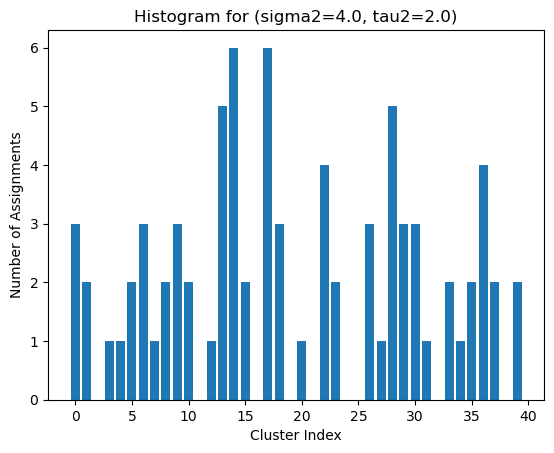

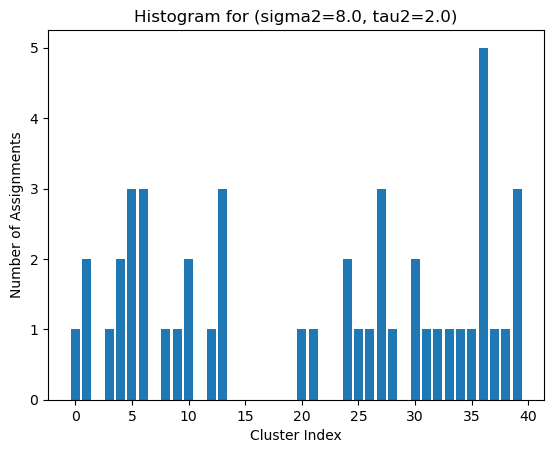

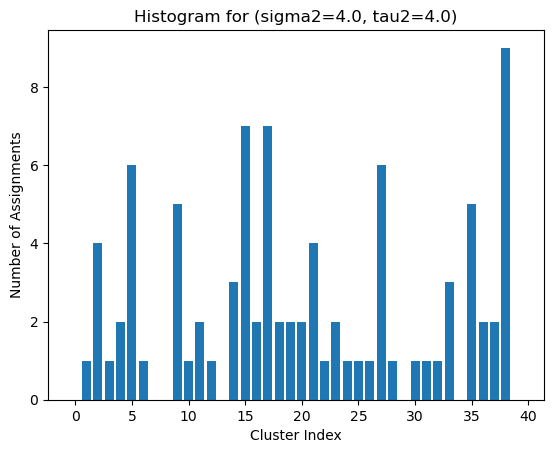

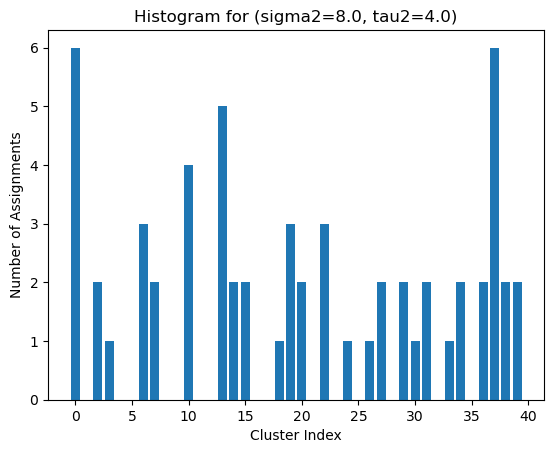

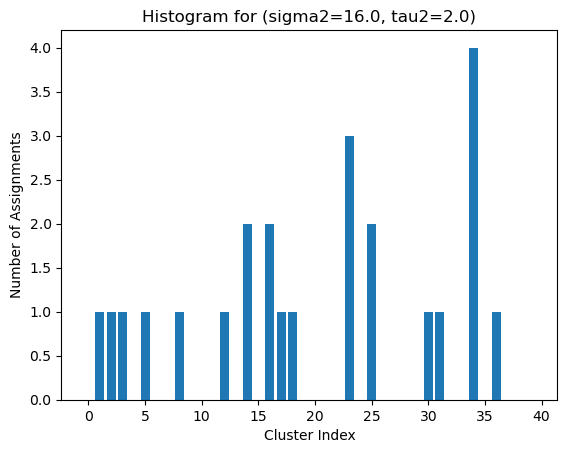

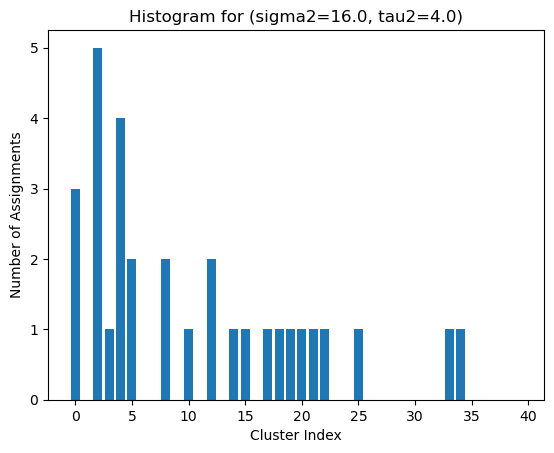

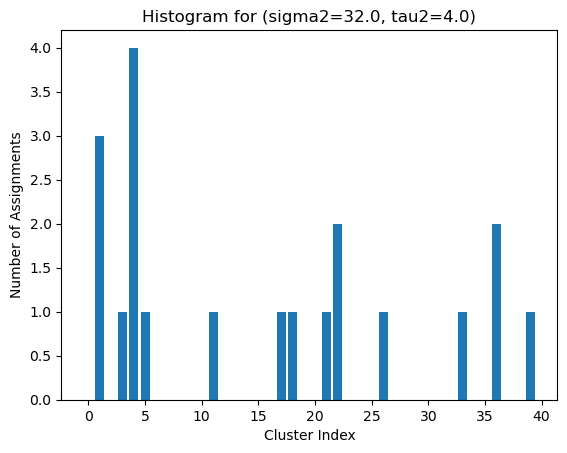

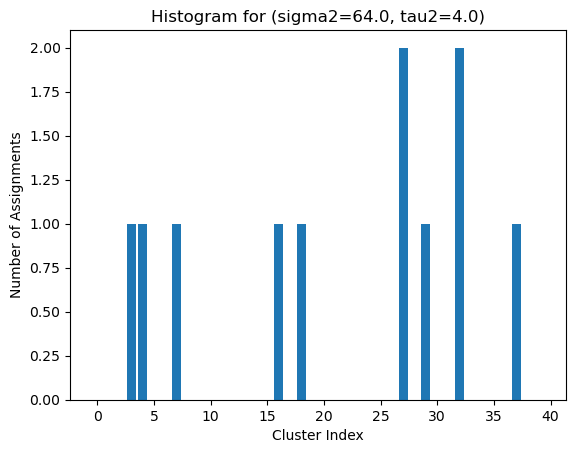

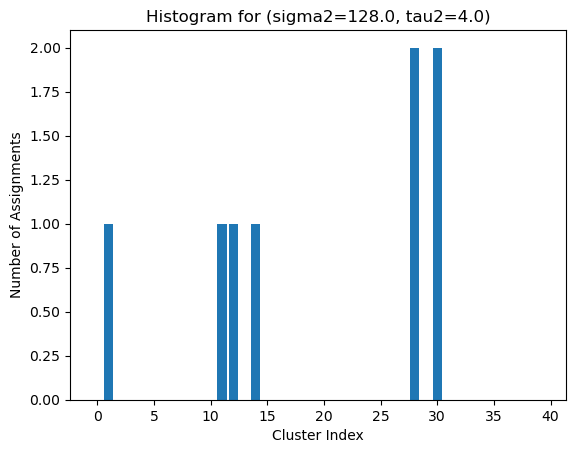

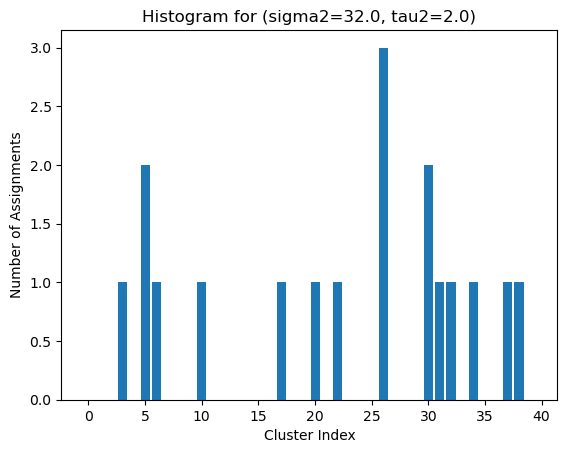

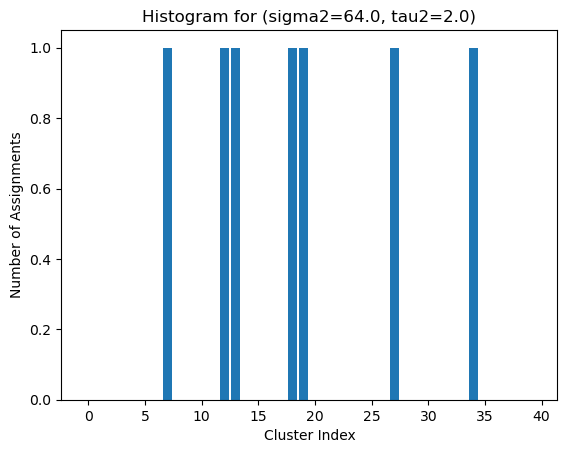

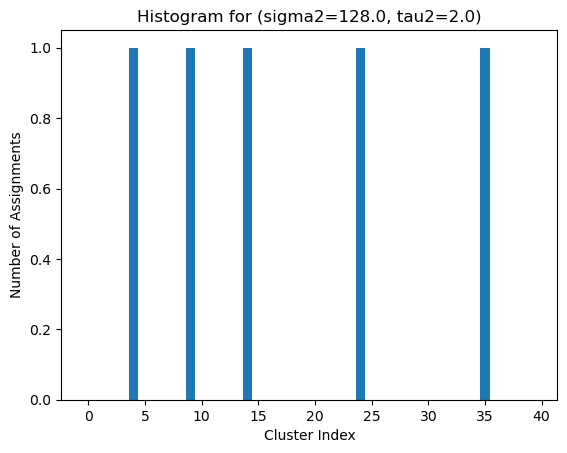

array([3, 2, 0, 1, 1, 2, 3, 1, 2, 3, 2, 0, 1, 5, 6, 2, 0, 6, 3, 0, 1, 0,
       4, 2, 0, 0, 3, 1, 5, 3, 3, 1, 0, 2, 1, 2, 4, 2, 0, 2, 0, 1, 4, 1,
       2, 6, 1, 0, 0, 5, 1, 2, 1, 0, 3, 7, 2, 7, 2, 2, 2, 4, 1, 2, 1, 1,
       1, 6, 1, 0, 1, 1, 1, 3, 0, 5, 2, 2, 9, 0, 1, 2, 0, 1, 2, 3, 3, 0,
       1, 1, 2, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 3, 1, 0,
       2, 1, 1, 1, 1, 1, 5, 1, 1, 3, 6, 0, 2, 1, 0, 0, 3, 2, 0, 0, 4, 0,
       0, 5, 2, 2, 0, 0, 1, 3, 2, 0, 3, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1,
       2, 0, 2, 6, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 0,
       0, 0, 3, 0, 5, 1, 4, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 3, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 1, 4, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [43]:
given_video_name = "E:\\Coding\\MultimediaWebDatabases\\Assets\\hmdb51_org\\target_videos\\drink\\CastAway2_drink_u_cm_np1_le_goo_8.avi"

stips_folder = "../Assets/hmdb51_org_stips_filtered"
action_subfolder = os.path.basename(os.path.dirname(given_video_name))  
video_name = os.path.basename(given_video_name)
stip_file_name = f"{video_name}.csv"
video_stip_path = os.path.join(stips_folder, action_subfolder, stip_file_name)

Task2b(given_video_name, video_stip_path)

# Task 2c

In [44]:
def Task2c(video_path, video_stip_path):
    
    # Example usage
    # visualize_video(video_path)

    # Example usage
    cluster_representatives = load_all_cluster_representatives_hof()

    stip_features = extract_features(video_stip_path)

    hist_data = []

    for row in stip_features:

        ind1 = assign_row_to_cluster(row[79:], cluster_representatives, get_sigma2_tau2_pair(row))
        hist_data.append([get_sigma2_tau2_pair(row), ind1])
    

    # print(hist_data)
    create_histogram_for_pairs(hist_data)

    # Concatenate the 12 histograms into a 480-dimensional vector
    bog_hof_480 = create_and_concatenate_histograms(hist_data)
    # print("Concatenated 480-dimensional vector:", bog_hof_480)
    # print("Shape of the concatenated vector:", bog_hof_480.shape)

    return bog_hof_480


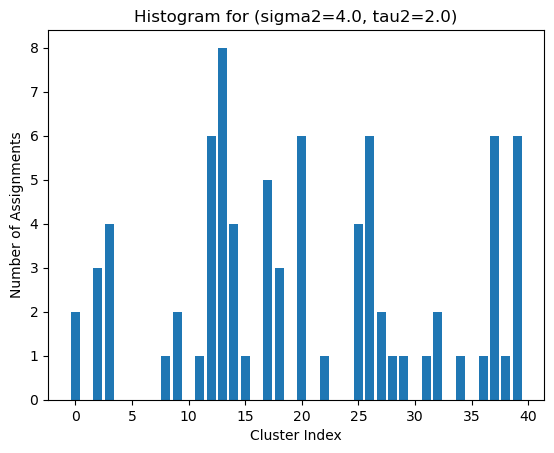

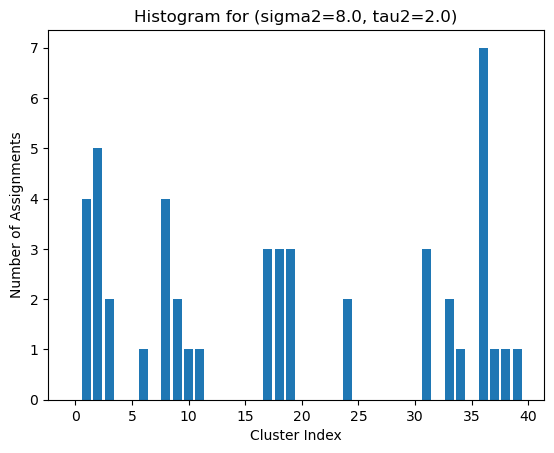

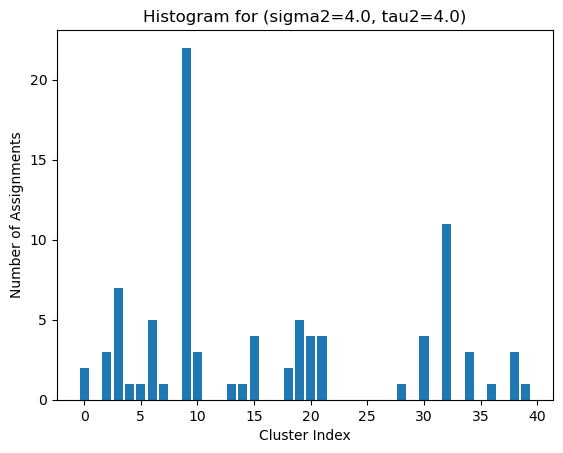

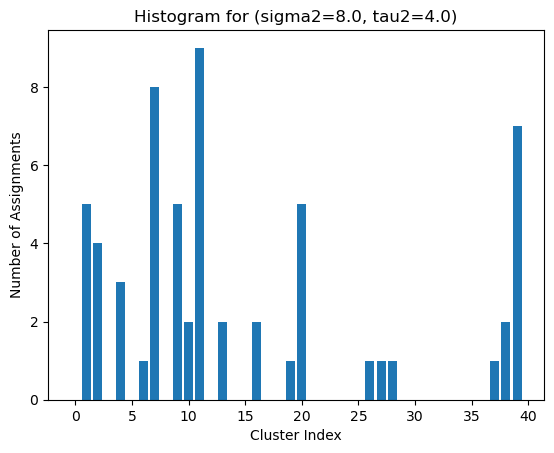

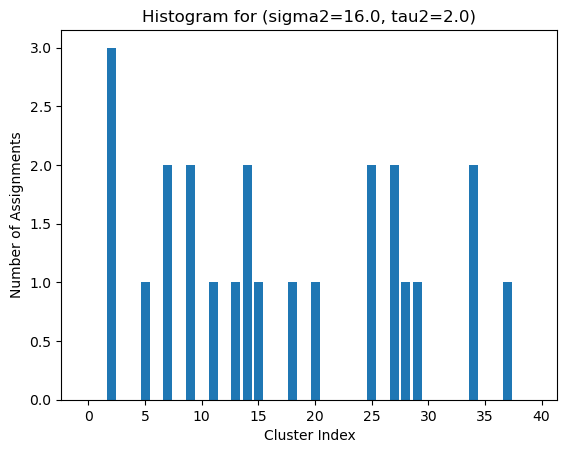

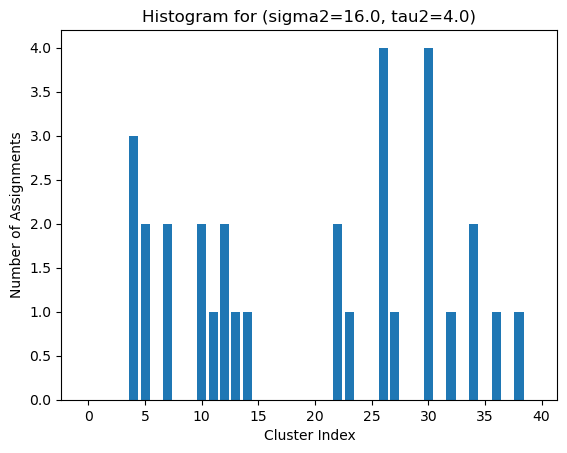

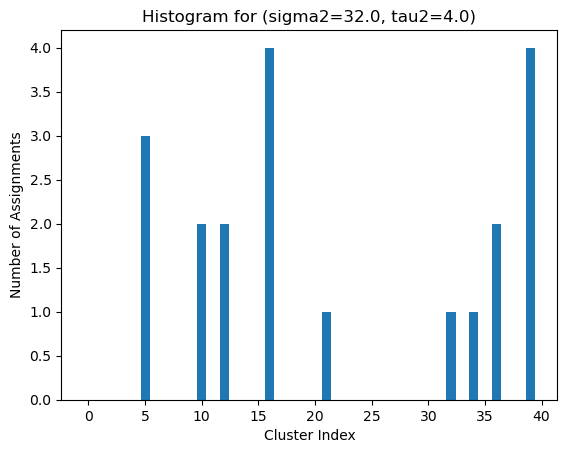

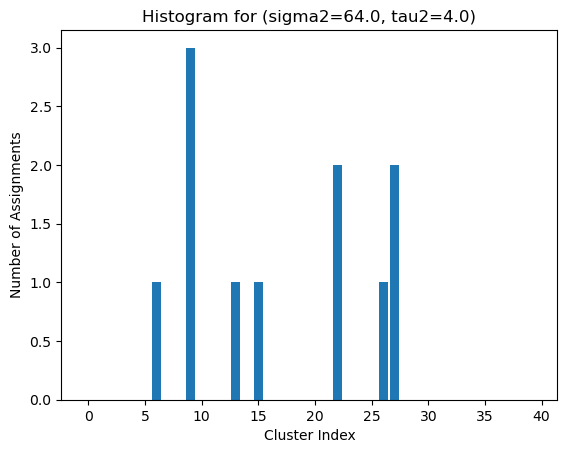

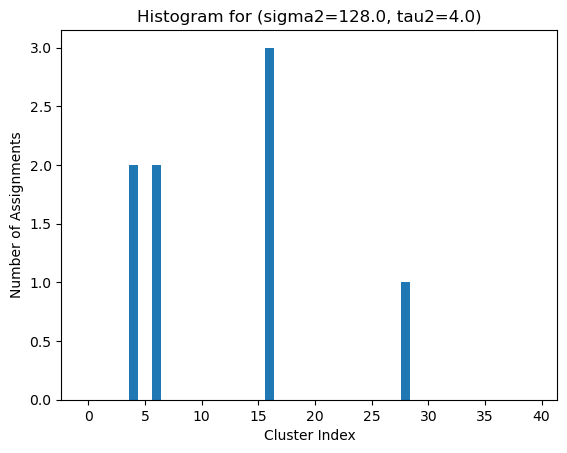

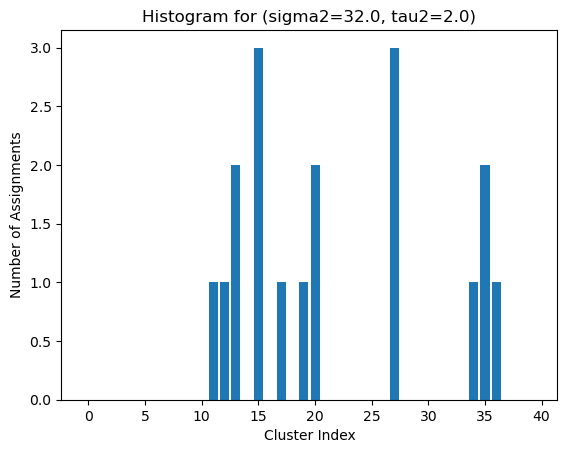

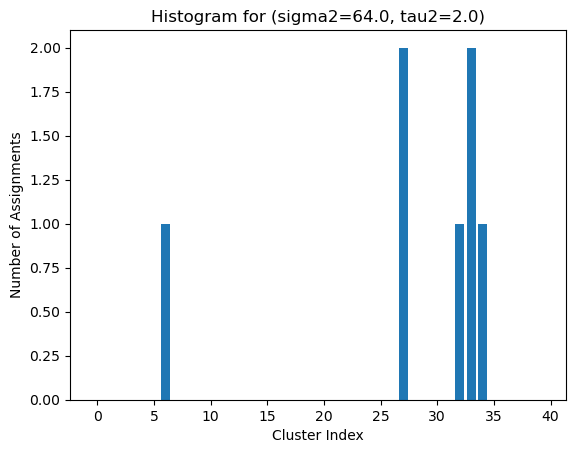

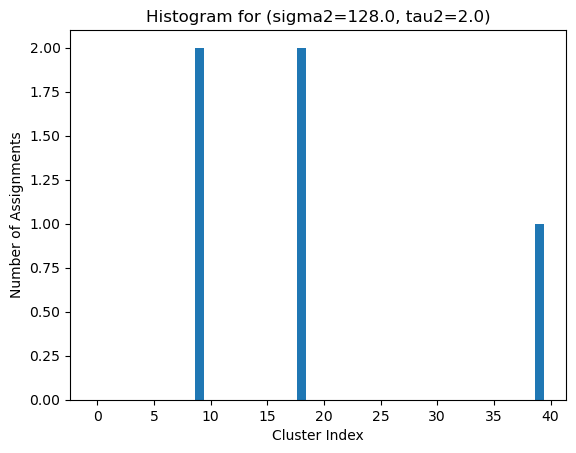

array([ 2,  0,  3,  4,  0,  0,  0,  0,  1,  2,  0,  1,  6,  8,  4,  1,  0,
        5,  3,  0,  6,  0,  1,  0,  0,  4,  6,  2,  1,  1,  0,  1,  2,  0,
        1,  0,  1,  6,  1,  6,  2,  0,  3,  7,  1,  1,  5,  1,  0, 22,  3,
        0,  0,  1,  1,  4,  0,  0,  2,  5,  4,  4,  0,  0,  0,  0,  0,  0,
        1,  0,  4,  0, 11,  0,  3,  0,  1,  0,  3,  1,  0,  4,  5,  2,  0,
        0,  1,  0,  4,  2,  1,  1,  0,  0,  0,  0,  0,  3,  3,  3,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  3,  0,  2,  1,  0,  7,  1,  1,
        1,  0,  5,  4,  0,  3,  0,  1,  8,  0,  5,  2,  9,  0,  2,  0,  0,
        2,  0,  0,  1,  5,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  2,  7,  0,  0,  3,  0,  0,  1,  0,  2,  0,  2,
        0,  1,  0,  1,  2,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  2,  0,
        2,  1,  1,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        3,  2,  0,  2,  0,  0,  2,  1,  2,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  2,  1,  0,  0

In [45]:
given_video_name = "E:\\Coding\\MultimediaWebDatabases\\Assets\\hmdb51_org\\target_videos\\drink\\CastAway2_drink_u_cm_np1_le_goo_8.avi"

stips_folder = "../Assets/hmdb51_org_stips_filtered"
action_subfolder = os.path.basename(os.path.dirname(given_video_name))  # Get the subfolder (action) name
video_name = os.path.basename(given_video_name)  # Get the video filename (e.g., videoname.avi)
# Create the corresponding STIP file name by appending '.csv' to the video filename
stip_file_name = f"{video_name}.csv"
# Construct the full path to the STIP file
video_stip_path = os.path.join(stips_folder, action_subfolder, stip_file_name)

Task2c(given_video_name, video_stip_path)